In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Function for transforming both training/testing
def clean(data):
    if 'Unnamed: 0' in data.columns:
        data = data.drop(columns=['Unnamed: 0', 'id'])
    else: 
        data = data.drop(columns=['id'])

    #Extract bedroom/bathrooms
    data['bedrooms'] = data['name'].apply(
    lambda x: x.split('·')[2].strip().split(' ')[0]
    if isinstance(x, str) and len(x.split('·')) > 2 else None
    )
    data['bathrooms'] = data['name'].apply(
    lambda x: x.split('·')[4].strip().split(' ')[0]
    if isinstance(x, str) and len(x.split('·')) > 4 else None
    )
    
    # No more use of name
    data = data.drop(columns=['name'])
    
    data['bathrooms'] = pd.to_numeric(data['bathrooms'], errors='coerce')  # Convert to numeric
    data['bedrooms'] = pd.to_numeric(data['bedrooms'], errors='coerce')  # Convert to numeric
    data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)  # Remove $ and commas, convert to float
    data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype(float)  # Remove % and convert to float
    data['host_acceptance_rate'] = data['host_acceptance_rate'].str.rstrip('%').astype(float)  # Remove % and convert to float


    # Convert columns to boolean
    boolean_columns = ['host_is_superhost', 'instant_bookable']
    data[boolean_columns] = data[boolean_columns].apply(lambda x: x.map({'t': 1, 'f': 0})).astype('float')

    # Convert columns to int

    # Convert revenue to float
    if 'monthly_revenue' in data.columns:
        data['monthly_revenue'] = data['monthly_revenue'].astype('float')

    categorical_columns = [
        'host_response_time',
        'neighbourhood',
        'neighbourhood_cleansed',
        'property_type',
        'room_type'
        ]   
    data[categorical_columns] = data[categorical_columns].astype('category')
    return data


In [3]:
training = pd.read_csv('data/train.csv')
testing = pd.read_csv('data/test.csv')
training = clean(training)
testing = clean(testing)

In [4]:
print(training[['bathrooms','bedrooms']])

      bathrooms  bedrooms
0           1.0       1.0
1           1.0       2.0
2           1.0       2.0
3           1.0       1.0
4           1.0       1.0
...         ...       ...
5347        1.0       1.0
5348        1.0       2.0
5349        2.5       3.0
5350        1.0       1.0
5351        1.0       1.0

[5352 rows x 2 columns]


In [5]:
training.head()

,neighborhood_overview,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,monthly_revenue
0,Everything you need is nearby. <br /><br />Hig...,57488206,Jessi,NaN,NaN,NaN,0.0,3,3,"Vancouver, British Columbia, Canada",...,4.80,4.82,4.90,4.87,4.69,4.81,0.0,3,0.77,2108.0
1,NaN,139792573,Daniel,within a few hours,100.0,100.0,0.0,1,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,NaN,2730.0
2,Beautiful neighbourhood close to prosperous Ma...,265504225,Alex,within an hour,100.0,98.0,1.0,1,1,"Vancouver, British Columbia, Canada",...,4.90,4.78,4.97,4.94,4.90,4.75,0.0,1,3.22,2254.0
3,We are located in a quiet residential neighbor...,22595056,Raymond,NaN,NaN,92.0,1.0,1,1,"Vancouver, British Columbia, Canada",...,5.00,5.00,5.00,5.00,4.86,5.00,0.0,1,1.28,3187.0
4,Kitsilano at it's best! Short walk to all the ...,65683877,Yendi,within an hour,100.0,95.0,1.0,2,3,"Vancouver, British Columbia, Canada",...,4.93,4.89,4.97,4.97,4.96,4.85,0.0,1,2.01,3479.0


In [6]:
testing.head()

,neighborhood_overview,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,We are less than a block to Kits pool - the la...,23168796,Oliver & Ashleigh,within a few hours,100.0,67.0,0.0,1,1,"Vancouver, British Columbia, Canada",...,4.98,4.93,4.95,5.00,5.00,4.98,4.88,0.0,1,0.38
1,One of the most eclectic areas in the Lower Ma...,16926150,Jesse,NaN,NaN,NaN,0.0,1,1,"Vancouver, British Columbia, Canada",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,NaN
2,Le Soleil Hotel and Suites is situated in the ...,536871978,Ivan,within an hour,100.0,95.0,0.0,4,4,"Vancouver, British Columbia, Canada",...,5.00,5.00,4.88,5.00,5.00,5.00,4.88,0.0,4,2.96
3,"Very safe and quite area,also very convenient ...",421206568,Xuerong,within an hour,100.0,98.0,1.0,4,4,"Vancouver, British Columbia, Canada",...,4.79,4.87,4.84,4.93,4.96,4.77,4.69,0.0,4,2.53
4,Mount Pleasant is a largely residential area w...,227662329,Jordan,within an hour,100.0,100.0,0.0,168,232,"Vancouver, British Columbia, Canada",...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.0,134,0.47


In [7]:
print(training.dtypes)

neighborhood_overview               object
host_id                              int64
host_name                           object
host_response_time                category
host_response_rate                 float64
host_acceptance_rate               float64
host_is_superhost                  float64
host_listings_count                  int64
host_total_listings_count            int64
neighbourhood                     category
neighbourhood_cleansed            category
latitude                           float64
longitude                          float64
property_type                     category
room_type                         category
accommodates                         int64
bathrooms                          float64
bedrooms                           float64
beds                               float64
amenities                           object
price                              float64
minimum_nights                       int64
maximum_nights                       int64
minimum_nig

## Correlation Analysis With Numerical Cols

In [8]:
numerical_cols = training.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = training[numerical_cols].corr()
revenue_correlation = correlation_matrix['monthly_revenue']

print(revenue_correlation)

host_id                           0.001982
host_response_rate                0.035355
host_acceptance_rate              0.055618
host_is_superhost                 0.019332
host_listings_count              -0.041623
host_total_listings_count        -0.045667
latitude                         -0.097562
longitude                         0.064500
accommodates                      0.453562
bathrooms                         0.337599
bedrooms                          0.412474
beds                              0.418004
price                             0.060963
minimum_nights                   -0.088194
maximum_nights                    0.015386
minimum_nights_avg_ntm           -0.085027
maximum_nights_avg_ntm            0.038330
availability_30                  -0.067935
availability_60                  -0.062997
availability_90                  -0.063104
availability_365                 -0.070586
number_of_reviews                 0.009059
number_of_reviews_ltm             0.048784
review_scor

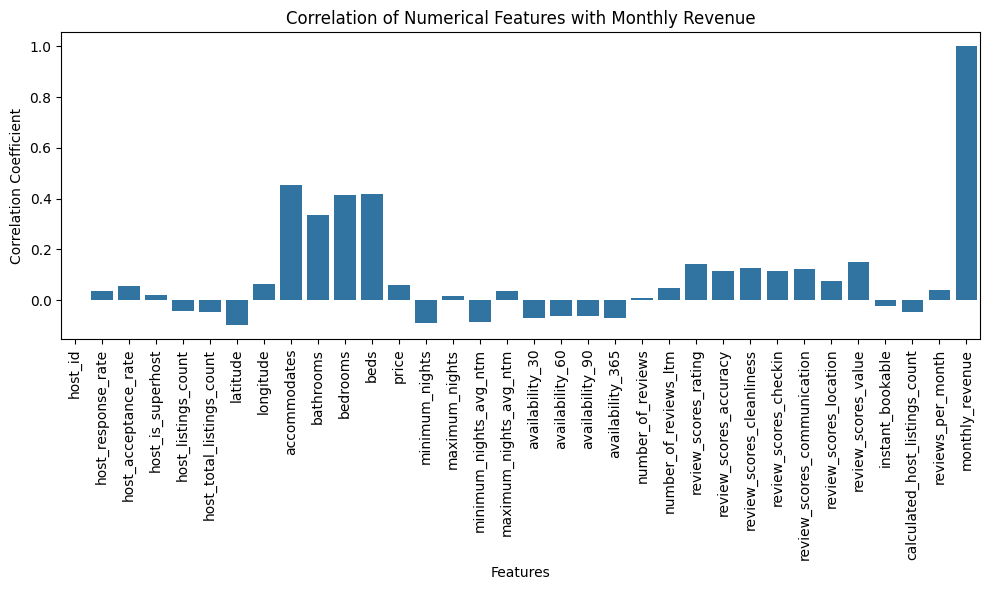

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_correlation.index, y=revenue_correlation.values)
plt.xticks(rotation=90)
plt.title("Correlation of Numerical Features with Monthly Revenue")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

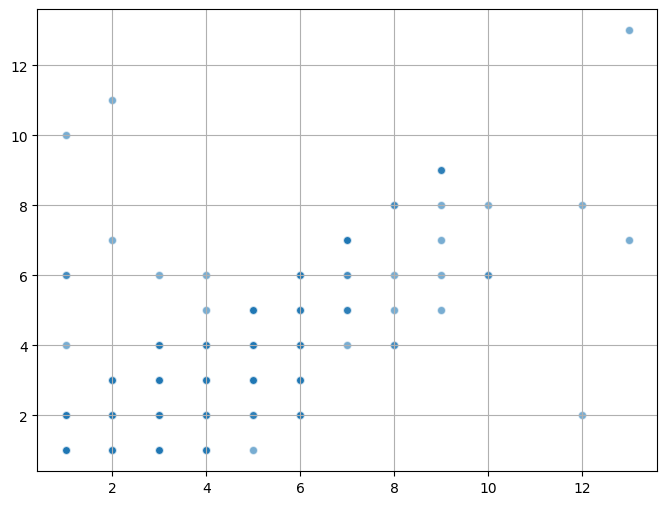

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(training['beds'], training['bedrooms'], alpha=0.6, edgecolors='w')
plt.grid(True)
plt.show()


In [11]:
training[['beds', 'bedrooms']].corr()

,beds,bedrooms
beds,1.000000,0.838831
bedrooms,0.838831,1.000000


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
X = training[numerical_cols]
X = X.dropna()
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
import ace_tools as tools; tools.display_dataframe_to_user(name="Variance Inflation Factor (VIF) Results", dataframe=vif_data)

ModuleNotFoundError: No module named 'ace_tools'

In [14]:
!which python  

/Users/harrypotter/Documents/Comps/WiDSCase/venv/bin/python
